In [10]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

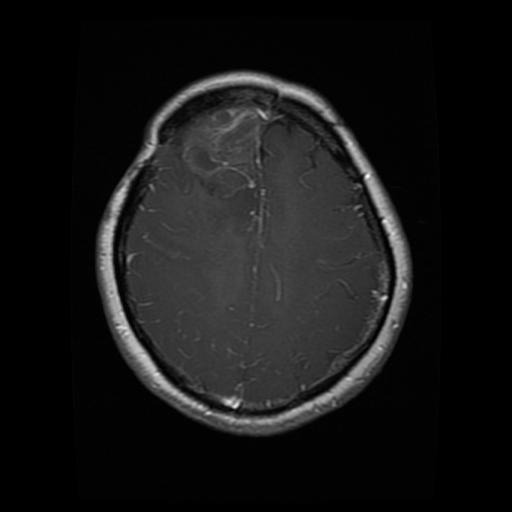

In [11]:
#Image Upload
img = cv2.imread("Tr-gl_0091.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image(filename = "Tr-gl_0091.jpg")


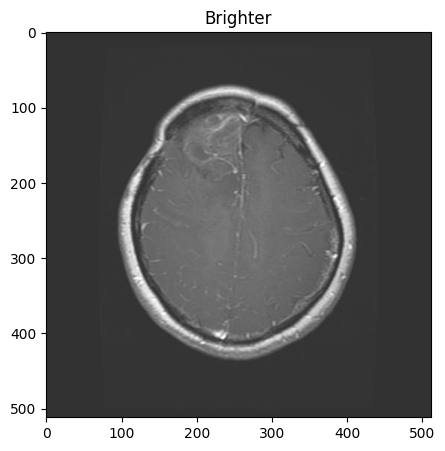

In [12]:
#Addition of Brightness
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)

plt.figure(figsize=[18, 5])
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

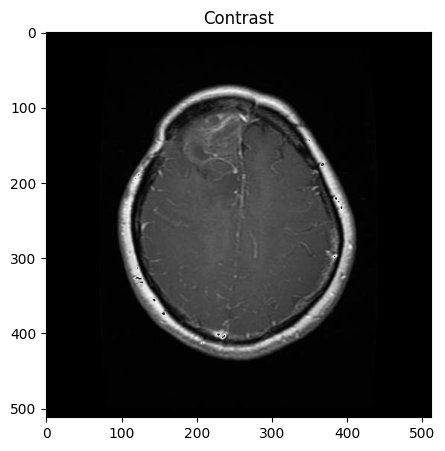

In [22]:
#Add Contrast
matrix_high_cont = np.ones(img_rgb.shape)*1.3

img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_high_cont))

plt.figure(figsize=[18, 5])
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Contrast");

C:\Users\User\AppData\Local\Temp\ipykernel_18400\920776609.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img2.flatten(),256,[0,256], color = 'r')


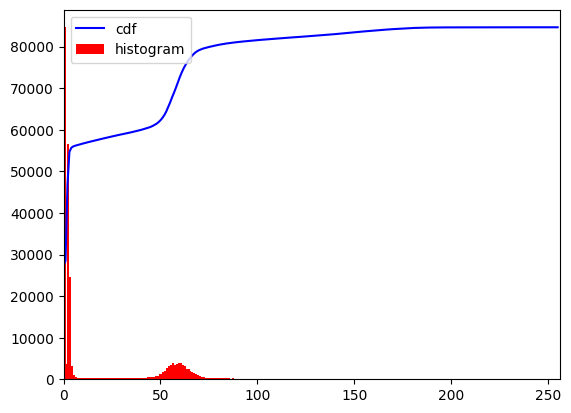

In [29]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [30]:
#Histogram equalizer function
def plot_histogram_and_cdf(image, title):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max() / cdf.max())


    plt.figure(figsize=(6,4))
    plt.title(title)
    plt.plot(hist, color='gray', label='Histogram')
    plt.plot(cdf_normalized, color='red', label='CDF')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [ ]:
 ===== 5. Display all images side-by-side =====
titles = [
    'Original Image',
    'Brightness Enhanced',
    'Contrast Enhanced',
    'Histogram Equalization',
    'CLAHE Equalization'
]
images = [img, bright_img, contrast_img, equalized_img, clahe_img]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


plot_histogram_and_cdf(img, 'Original Image Histogram & CDF')
plot_histogram_and_cdf(equalized_img, 'Equalized Image Histogram & CDF')
plot_histogram_and_cdf(clahe_img, 'CLAHE Image Histogram & CDF')
